In [1]:
import pandas as pd
import os

directory = "../data/processed/"
datasets = {}

for foldername in os.listdir(directory):
    print(foldername)     
    file_path = os.path.join(directory, foldername, foldername + '_processed.csv.gz')
    #print(file_path)
    if os.path.exists(file_path):  # Check if file exists before reading
        datasets[foldername] = pd.read_csv(file_path, compression='gzip')
    else:
        print(f"No matching file found for folder: {foldername}")


toxcast
JUMPCP_compounds
BBBP
sider
tox21
muv
HIV
DILIst
PK_Lombardo
bace
clintox


In [2]:
datasets["PK_Lombardo"].columns

Index(['Name', 'smiles', 'human VDss (L/kg)', 'human CL (mL/min/kg)',
       'fraction unbound \nin plasma (fu)', 'MRT (h)', 'terminal  t1/2 (h)',
       'MW', 'HBA', 'HBD', 'TPSA_NO', 'RotBondCount', 'moka_ionState7.4',
       'MoKa.LogP', 'MoKa.LogD7.4', 'Standardized_SMILES',
       'Standardized_InChI'],
      dtype='object')

In [3]:
#The PK data had some strings that need to be numeric for later calculations
datasets["PK_Lombardo"]['terminal  t1/2 (h)'] = pd.to_numeric(datasets["PK_Lombardo"]['terminal  t1/2 (h)'] , errors='coerce')

rename_columns = {
    'human VDss (L/kg)': 'human_VDss_L_per_kg',
    'human CL (mL/min/kg)': 'human_CL_mL_per_min_per_kg',
    'fraction unbound \nin plasma (fu)': 'fraction_unbound_in_plasma_fu',
    'MRT (h)': 'MRT_h',
    'terminal  t1/2 (h)': 'terminal_t1_per_2_h'
}

datasets["PK_Lombardo"] = datasets["PK_Lombardo"].rename(columns=rename_columns)
datasets["PK_Lombardo"]

,Name,smiles,human_VDss_L_per_kg,human_CL_mL_per_min_per_kg,fraction_unbound_in_plasma_fu,MRT_h,terminal_t1_per_2_h,MW,HBA,HBD,TPSA_NO,RotBondCount,moka_ionState7.4,MoKa.LogP,MoKa.LogD7.4,Standardized_SMILES,Standardized_InChI
0,?-hANP,N1[C@H](C(=O)N[C@H](C(=O)N[C@H](C(=O)N[C@H](C(...,0.20,25.40,NaN,0.13,0.22,3080.44,84,53,1403.4,75,cationic,-9.00,-9.000,CCC(C)C1N=C(O)C(CCCNC(N)=[NH2+])N=C(O)C(CC(=O)...,InChI=1S/C127H203N45O39S3/c1-9-64(6)99-121(209...
1,(-)dOTC,c1cn(c(=O)nc1N)[C@H]2CO[C@H](S2)CO,1.18,3.00,NaN,6.50,19.20,229.26,6,2,90.4,2,neutral,-1.90,-1.900,N=c1ccn(C2COC(CO)S2)c(=O)[n-]1,InChI=1S/C8H11N3O3S/c9-5-1-2-11(8(13)10-5)6-4-...
2,(+)dOTC,c1cn(c(=O)nc1N)[C@@H]2CO[C@@H](S2)CO,0.84,3.90,NaN,3.60,8.92,229.26,6,2,90.4,2,neutral,-1.90,-1.900,N=c1ccn(C2COC(CO)S2)c(=O)[n-]1,InChI=1S/C8H11N3O3S/c9-5-1-2-11(8(13)10-5)6-4-...
3,"1,3-DCQA",O[C@@H]1C[C@@](C[C@@H](OC(=O)\C=C\c2ccc(O)c(O)...,0.79,8.70,NaN,1.50,1.37,516.45,12,7,211.3,9,anionic,2.10,-1.600,O=C(C=Cc1ccc([O-])c([O-])c1)OC1CC(OC(=O)C=Cc2c...,InChI=1S/C25H24O12/c26-15-5-1-13(9-17(15)28)3-...
4,16-acetyl gitoxin,C1([C@@H]2[C@@]3([C@@]([C@@H]4[C@@H]([C@@]5(CC...,0.78,8.70,0.07,72.30,51.60,822.98,15,5,209.1,9,neutral,0.93,0.930,CC(=O)OC1CC2(O)C3CCC4CC(OC5CC(O)C(OC6CC(O)C(OC...,InChI=1S/C43H66O15/c1-20-38(49)29(45)15-35(52-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,Zonampanel,OC(=O)CN1C(=O)C(=O)Nc2cc(c(cc12)n3ccnc3)N(=O)=O,0.19,5.30,NaN,0.60,0.78,331.24,11,2,150.4,4,anionic,-0.45,-3.800,O=C([O-])Cn1c(=O)c(=O)[n-]c2cc([N+](=O)[O-])c(...,InChI=1S/C13H9N5O6/c19-11(20)5-17-8-4-9(16-2-1...
1334,Zoniporide,C(=O)(NC(=N)N)c1c(n(nc1)c1c2c(ccc1)nccc2)C1CC1,1.70,21.00,0.34,1.30,2.00,320.35,7,3,109.7,4,neutral,1.00,1.000,NC(=[NH2+])NC(=O)c1cnn(-c2cccc3ncccc23)c1C1CC1,InChI=1S/C17H16N6O/c18-17(19)22-16(24)12-9-21-...
1335,Zopiclone,CN1CCN(CC1)C(=O)OC2N(C(=O)c3nccnc23)c4ccc(Cl)cn4,1.30,3.30,0.20,6.60,5.20,388.81,9,0,91.8,3,cationic,0.77,0.045,C[NH+]1CC[NH+](C(=O)Oc2c3nccnc3c([O-])n2-c2ccc...,InChI=1S/C17H17ClN6O3/c1-22-6-8-23(9-7-22)17(2...
1336,Zoptarelin doxorubicin,COc1cccc2C(=O)c3c(O)c4C[C@](O)(C[C@H](O[C@H]5C...,NaN,22.00,NaN,NaN,2.02,1893.01,45,23,713.4,48,cationic,-1.80,-6.300,COc1cccc2c([O-])c3c([O-])c4c(c([O-])c3c([O-])c...,InChI=1S/C91H117N19O26/c1-44(2)31-58(83(125)10...


In [4]:
inchi_sets = {}
smiles_sets = {}

for name, df in datasets.items():
    inchi_sets[name] = set(df['Standardized_InChI'].unique())
    smiles_sets[name] = set(df['Standardized_SMILES'].unique())

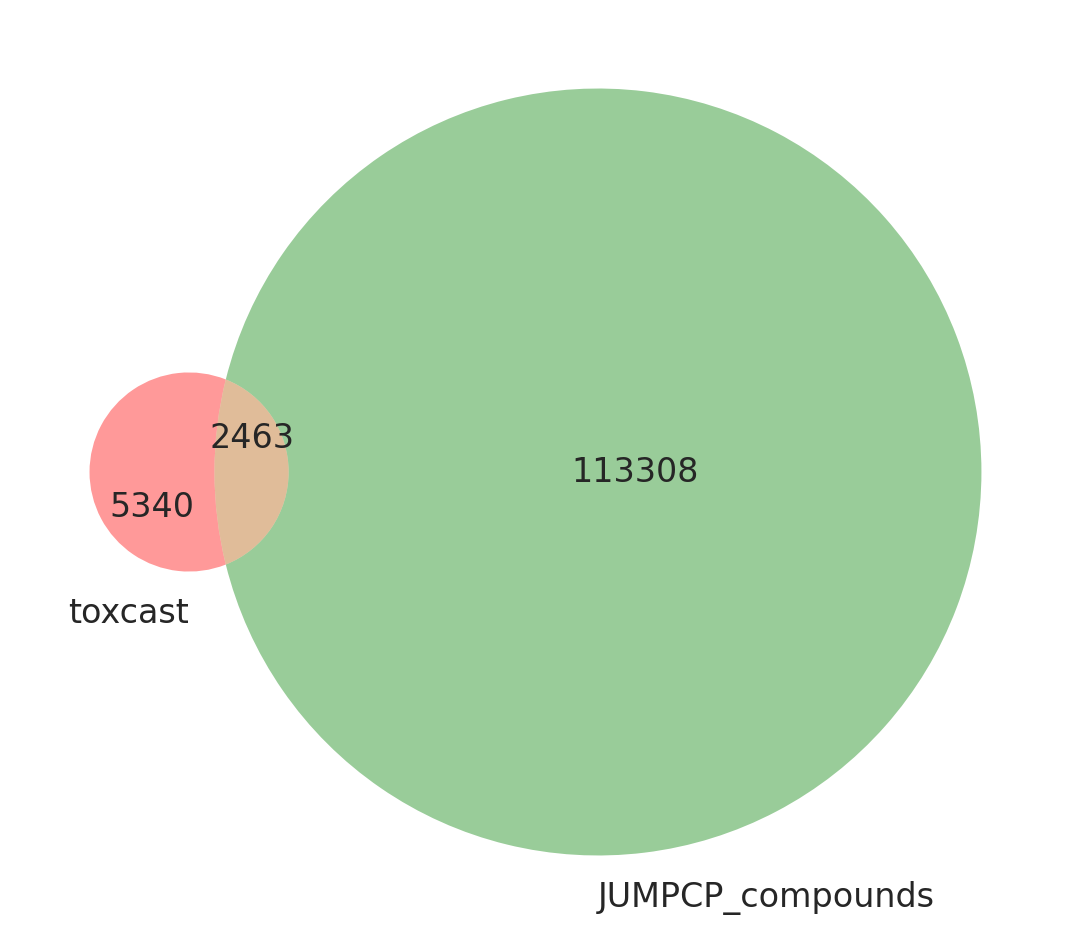

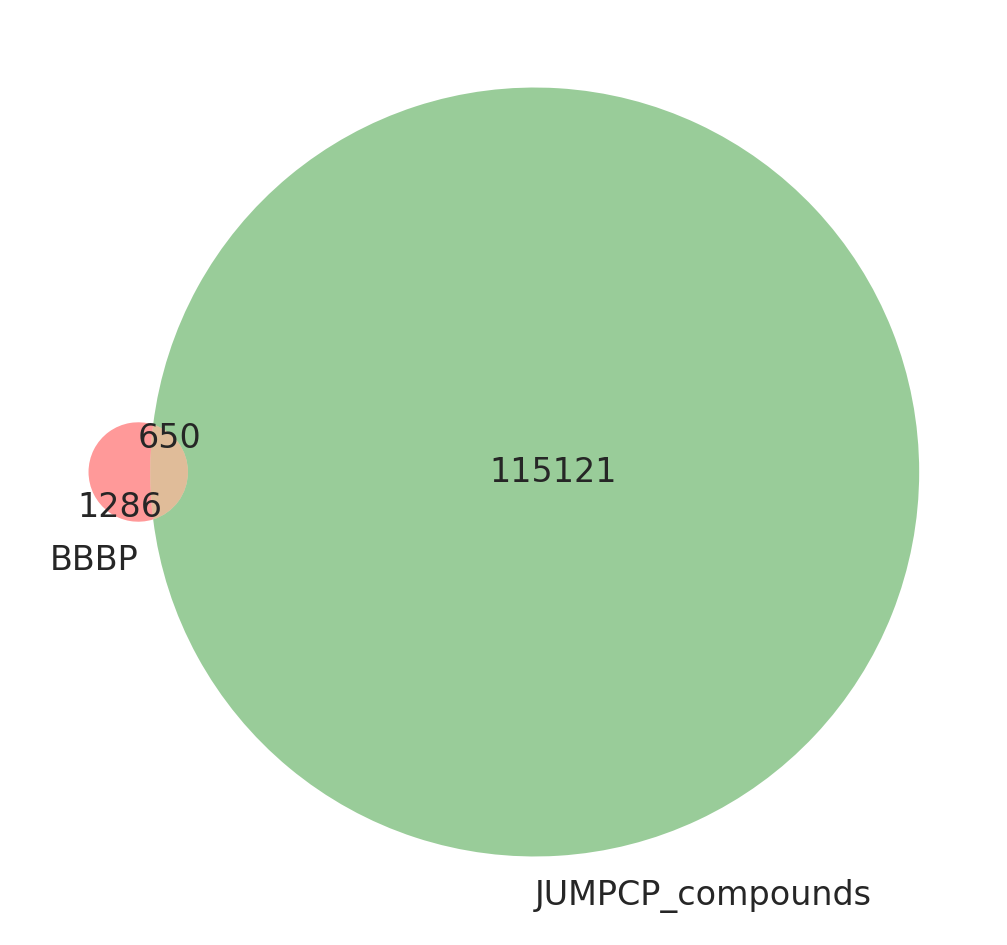

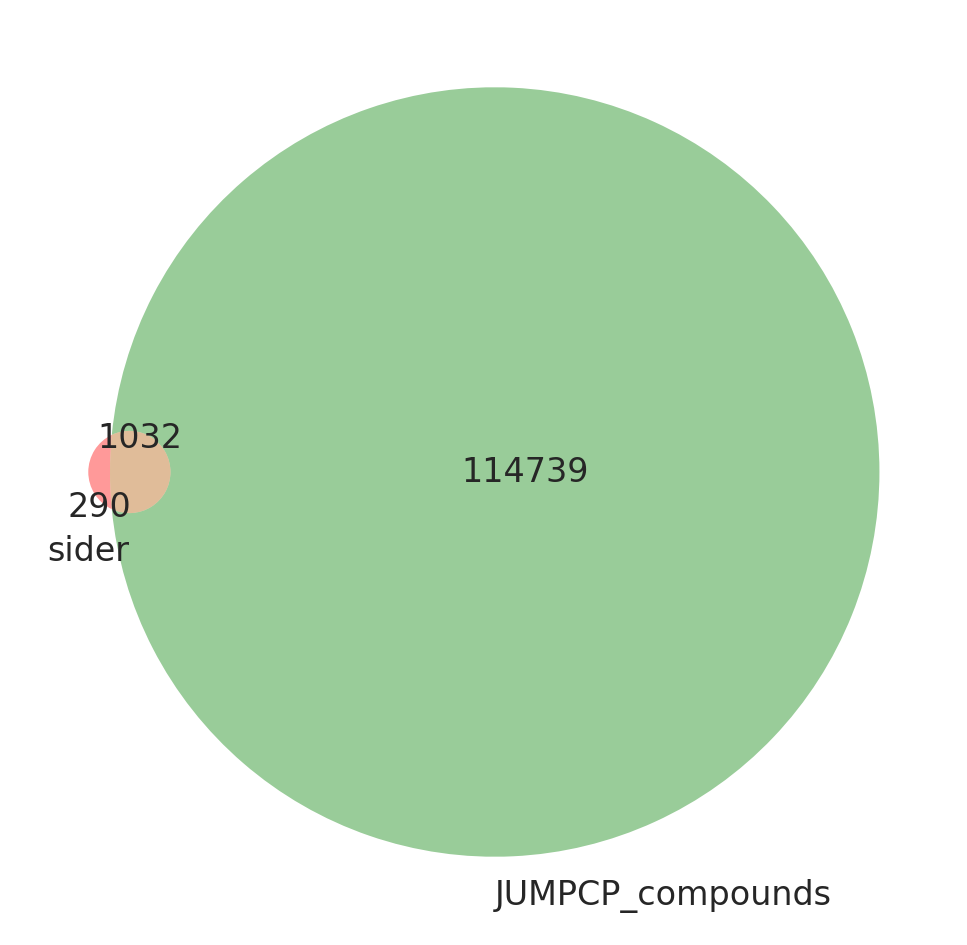

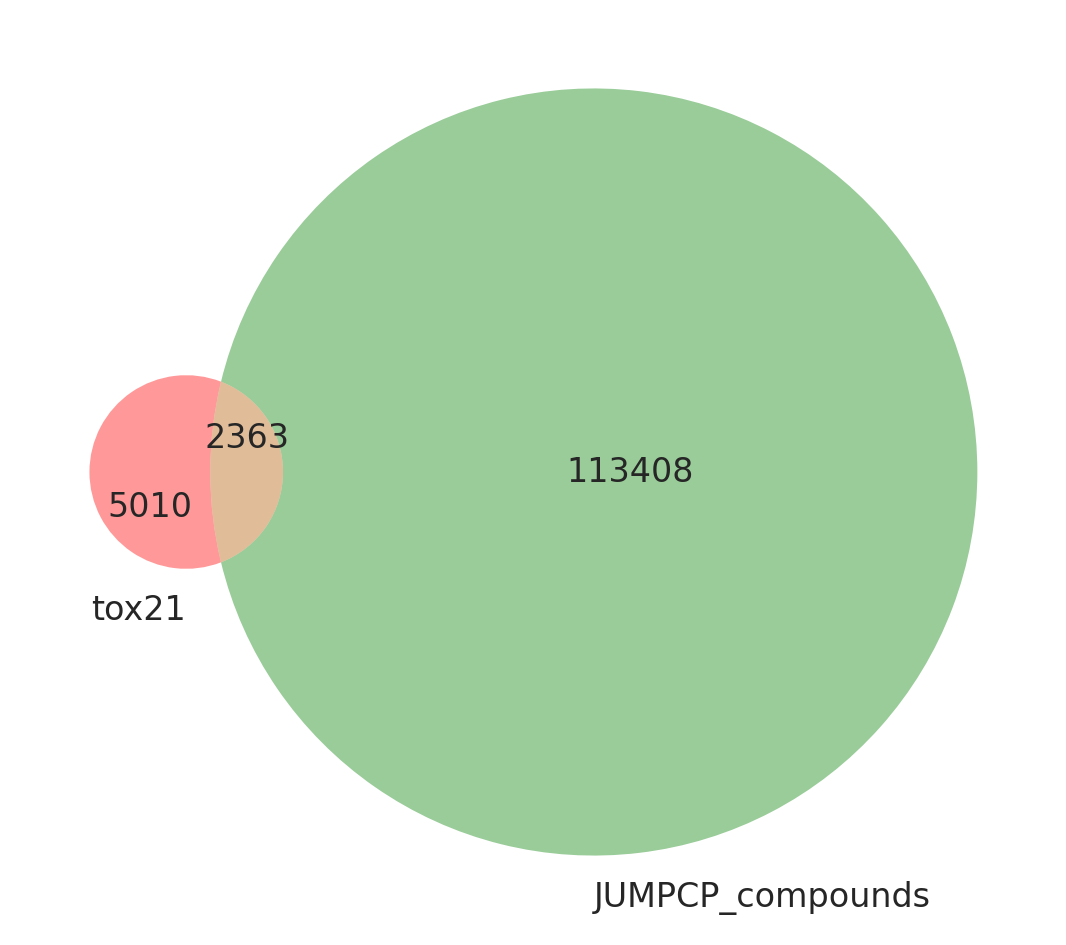

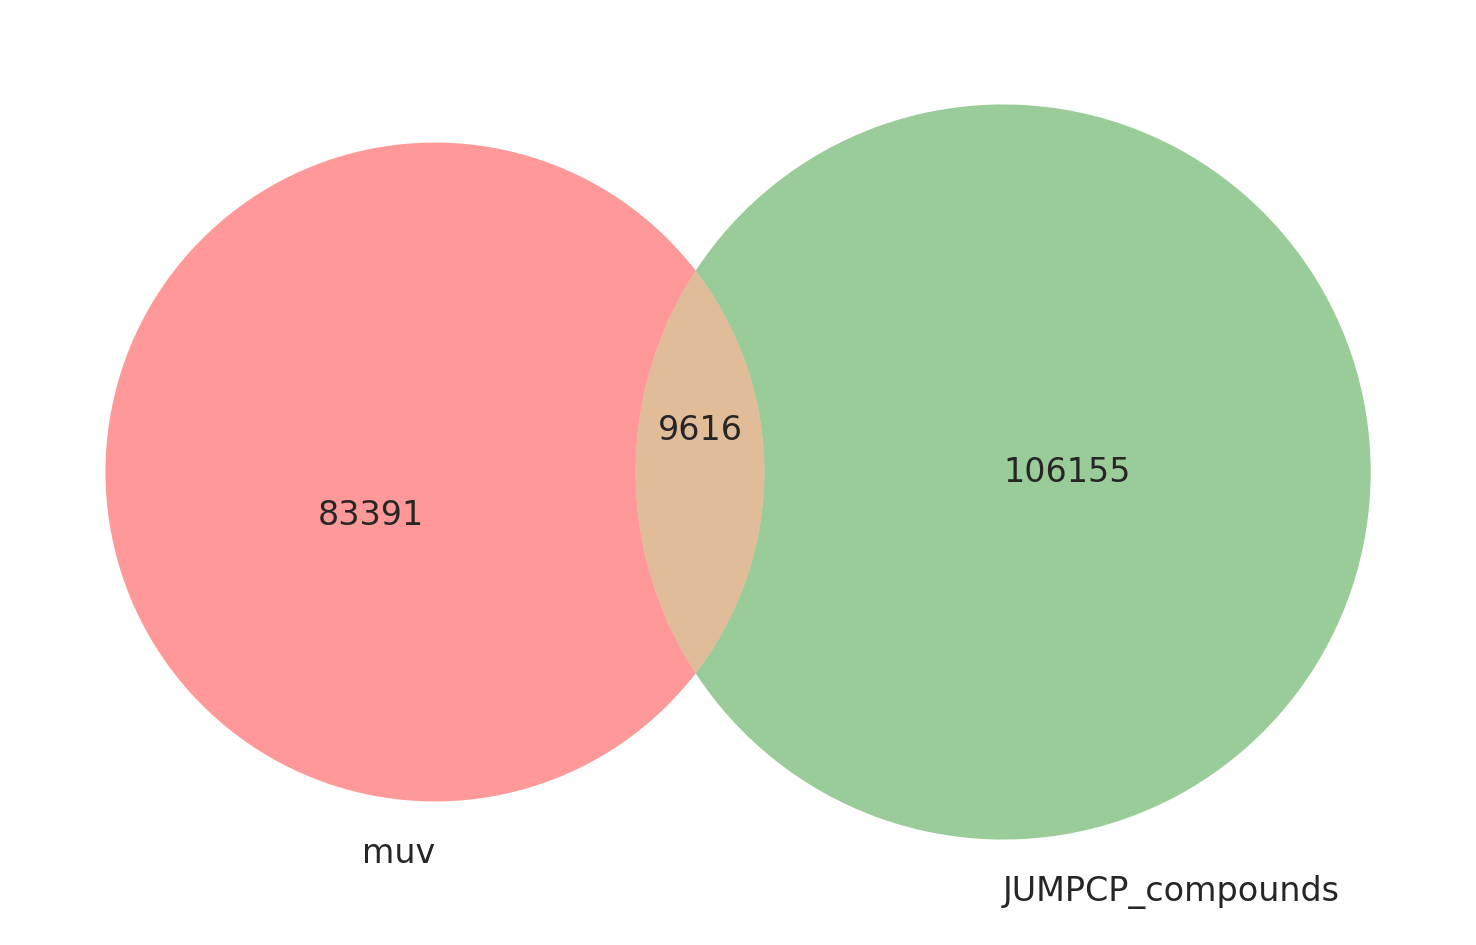

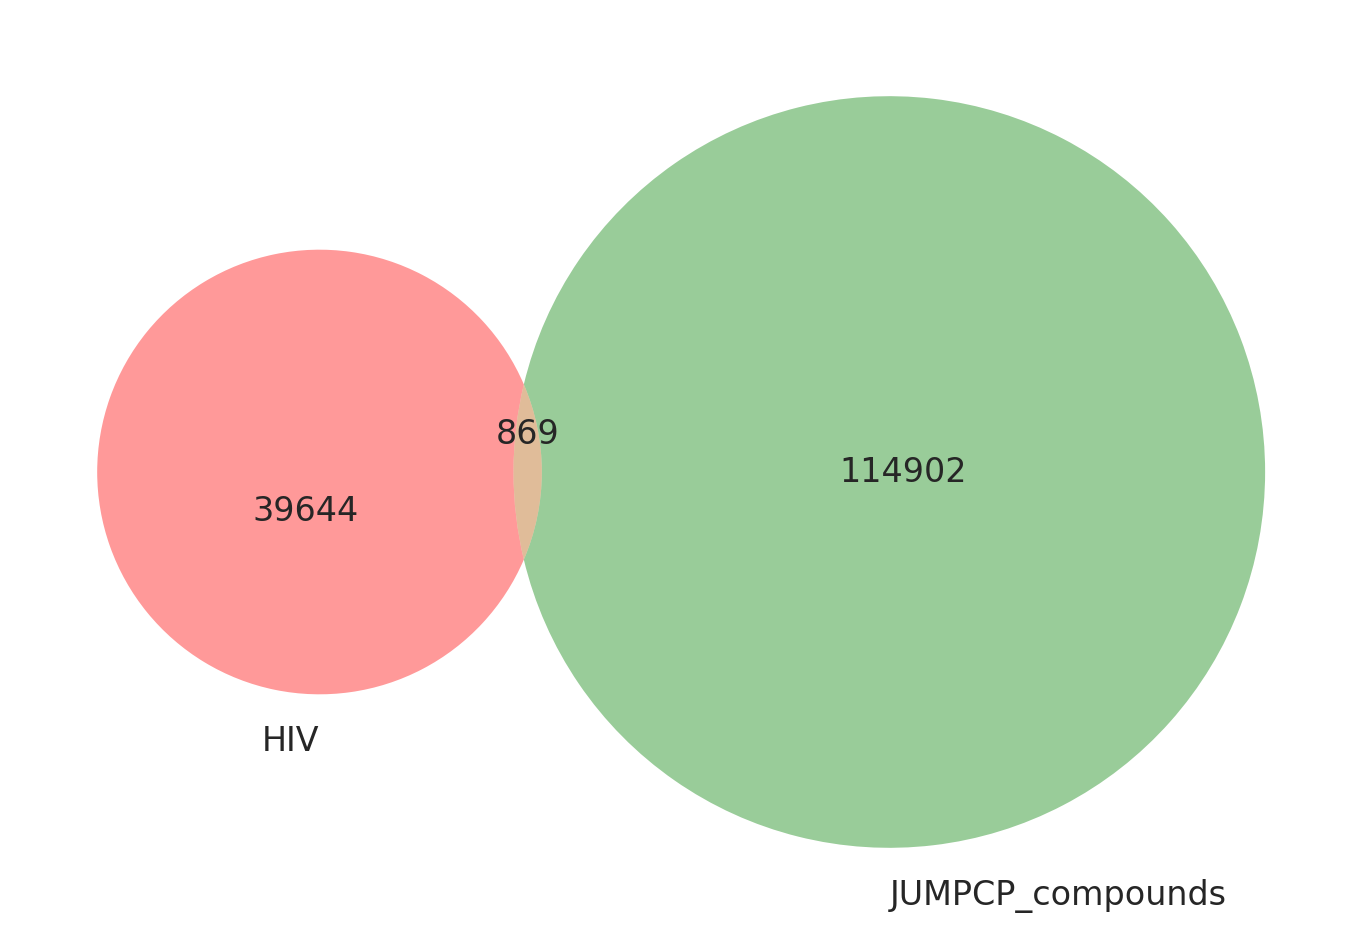

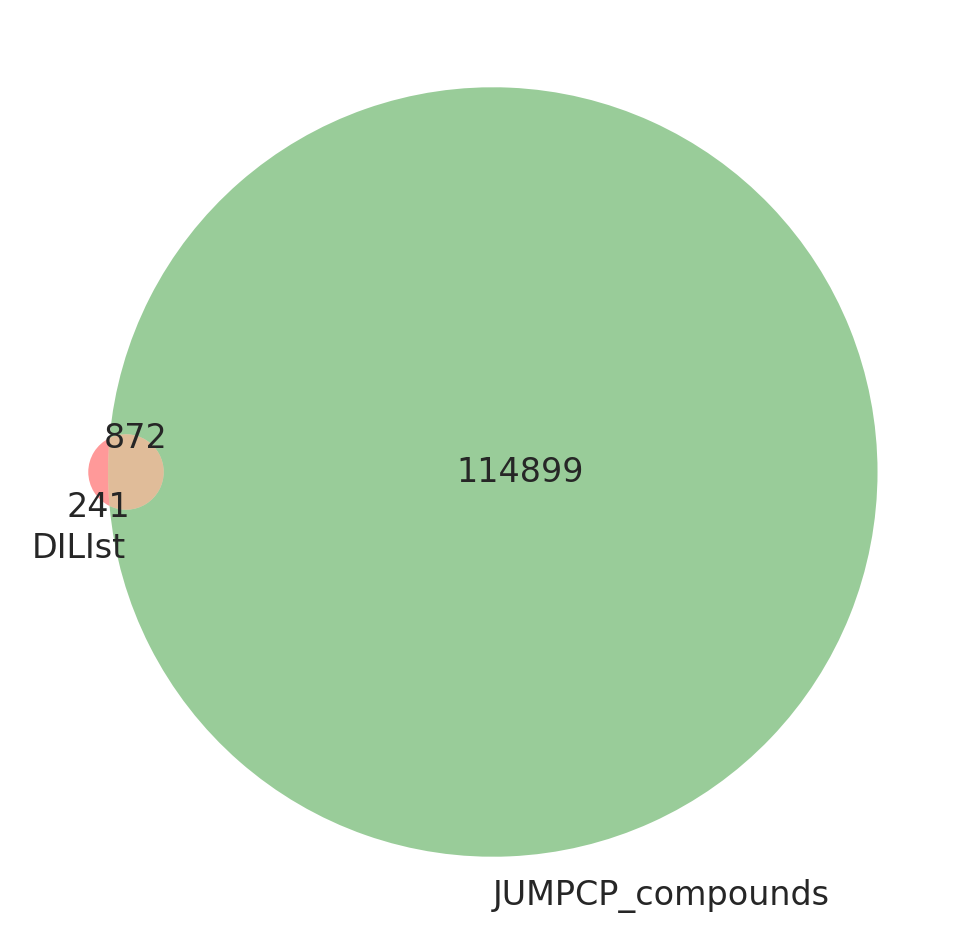

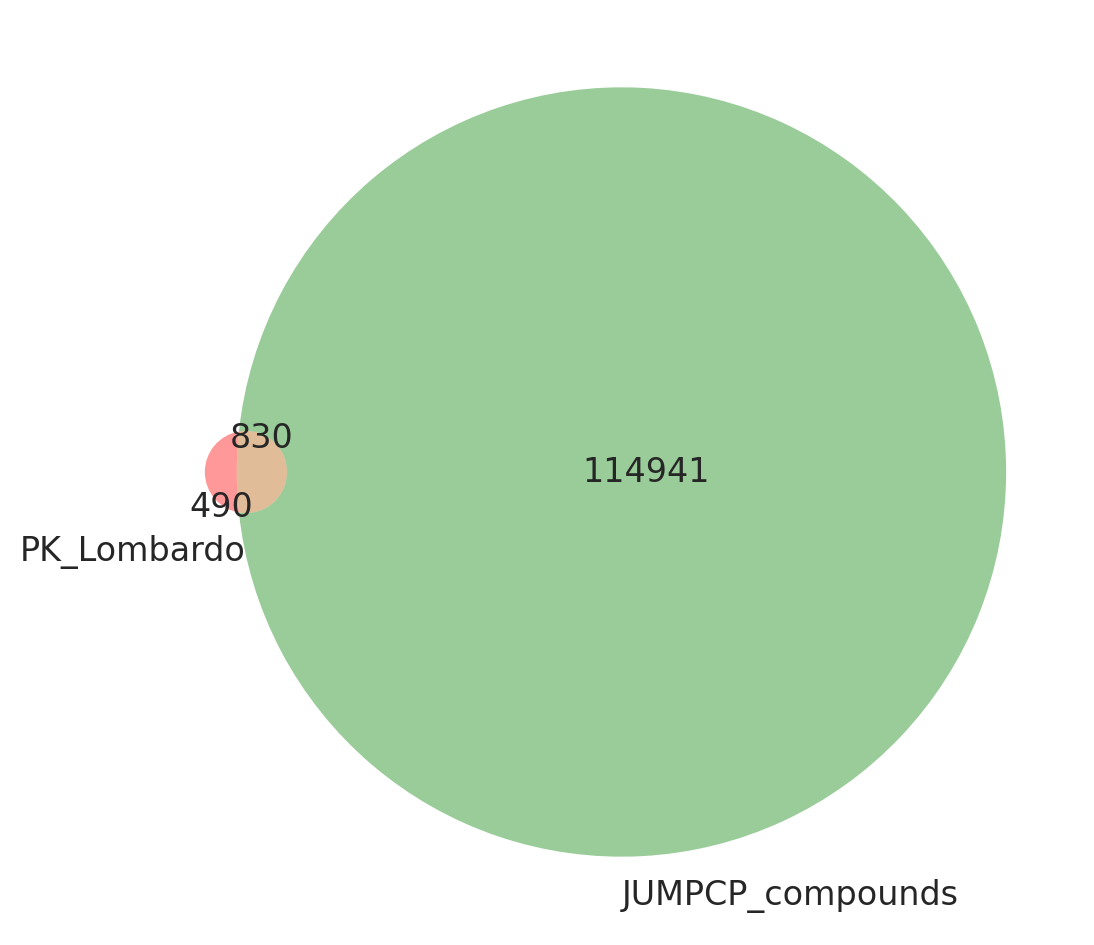

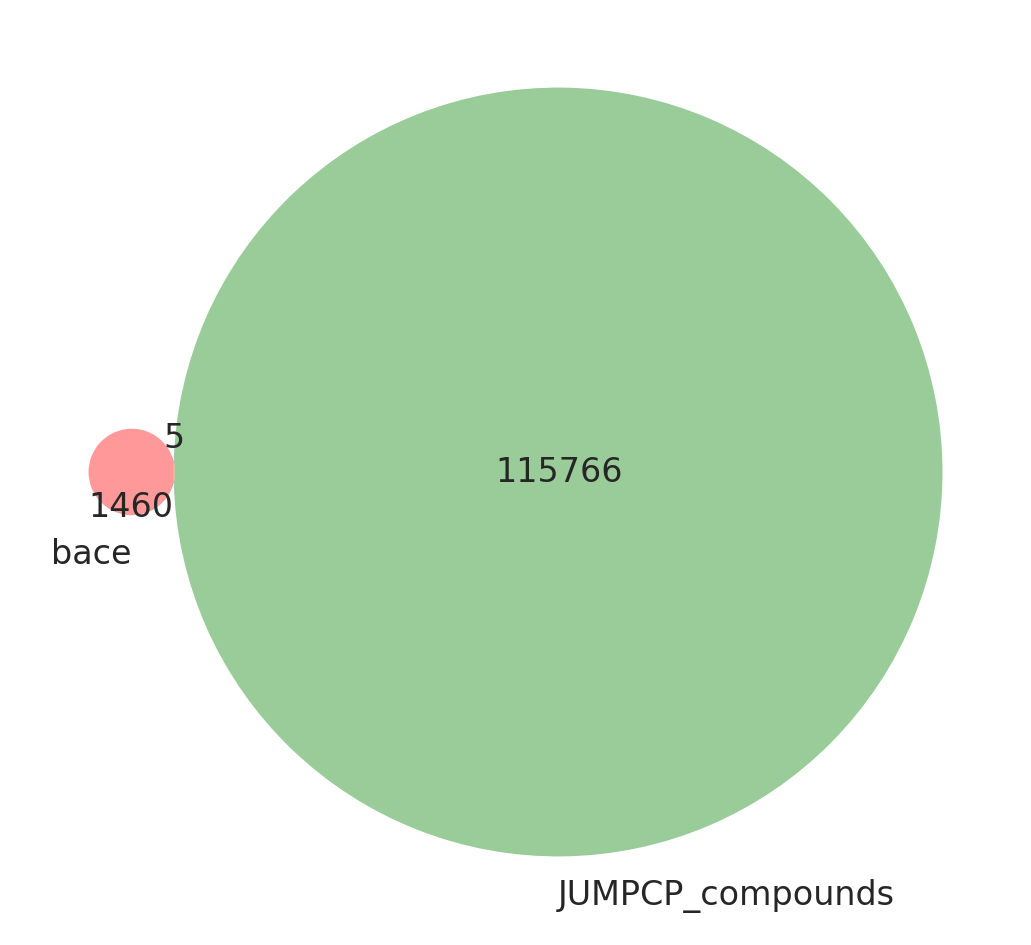

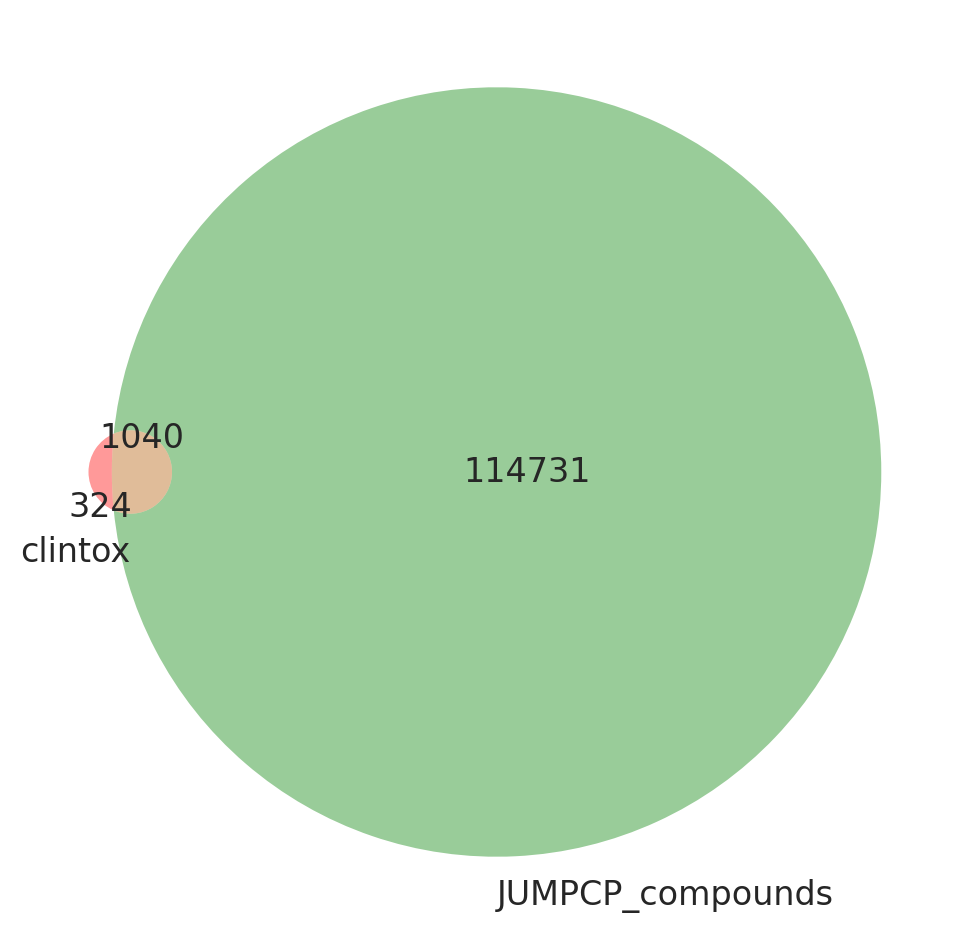

In [5]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
import seaborn as sns


# Check if JUMPCP is in your datasets
if 'JUMPCP_compounds' not in datasets:
    raise ValueError("JUMPCP_compounds not found in datasets")

# Iterate through each dataset and compare with JUMCP
for name, data in datasets.items():
    if name != "JUMPCP_compounds":  # Avoid self-comparison
        # Compare based on InChI

        # Use Seaborn's style
        sns.set_style("whitegrid")
        sns.set_palette("pastel")

        # Define figure size and DPI
        fig = plt.figure(figsize=(10, 6), dpi=200)  # Width=10 inches, Height=6 inches, DPI=100

        venn = venn2([inchi_sets[name], inchi_sets['JUMPCP_compounds']], set_labels=[name, 'JUMPCP_compounds'])
        
        
        venn.get_label_by_id('10').set_fontsize(12)  # Set1 only
        label = venn.get_label_by_id('10')
        x, y = label.get_position()
        label.set_position((x, y-0.05))  # adjust y value as needed
        
        venn.get_label_by_id('11').set_fontsize(12)  # Intersection
        label = venn.get_label_by_id('11')
        x, y = label.get_position()
        label.set_position((x, y+0.05))  # adjust y value as needed

        venn.get_label_by_id('01').set_fontsize(12)  # Set2 only

        #plt.title(f"Overlap based on InChI between {name} and JUMPCP_compounds", fontsize=16)
        plt.show()

        # Compare based on SMILES
        #venn2([smiles_sets[name], smiles_sets['JUMPCP_compounds']], set_labels=[name, 'JUMPCP_compounds'])
        #plt.title(f"Overlap based on SMILES between {name} and JUMPCP_compounds")
        #plt.show()

In [6]:
for name, df in datasets.items():
    
    if name != "JUMPCP_compounds":
        initial_len = len(df)
        df_filtered = df[df.Standardized_InChI.isin(inchi_sets["JUMPCP_compounds"])].reset_index(drop=True)
        final_len = len(df_filtered)

        print(f"Dataset: {name}")
        print(f"Initial length: {initial_len}")
        print(f"Length after filtering: {final_len}\n")

        datasets[name] = df_filtered  # Overwrite the dataset with the filtered dataframe
    

Dataset: toxcast
Initial length: 8480
Length after filtering: 2777

Dataset: BBBP
Initial length: 2038
Length after filtering: 698

Dataset: sider
Initial length: 1378
Length after filtering: 1077

Dataset: tox21
Initial length: 7749
Length after filtering: 2531

Dataset: muv
Initial length: 93085
Length after filtering: 9627

Dataset: HIV
Initial length: 41074
Length after filtering: 963

Dataset: DILIst
Initial length: 1145
Length after filtering: 894

Dataset: PK_Lombardo
Initial length: 1338
Length after filtering: 846

Dataset: bace
Initial length: 1513
Length after filtering: 5

Dataset: clintox
Initial length: 1454
Length after filtering: 1124



In [7]:
activity_columns_mapping = {
    'toxcast': datasets["toxcast"].columns.to_list()[1:-2],
    'BBBP': ['p_np'],
    'sider': datasets["sider"].columns.to_list()[1:-2],
    'tox21': ['NR-AR', 'NR-AR-LBD', 'NR-AhR', 'NR-Aromatase', 'NR-ER', 'NR-ER-LBD',
       'NR-PPAR-gamma', 'SR-ARE', 'SR-ATAD5', 'SR-HSE', 'SR-MMP', 'SR-p53'],
    'muv': ['MUV-466', 'MUV-548', 'MUV-600', 'MUV-644', 'MUV-652', 'MUV-689',
       'MUV-692', 'MUV-712', 'MUV-713', 'MUV-733', 'MUV-737', 'MUV-810',
       'MUV-832', 'MUV-846', 'MUV-852', 'MUV-858', 'MUV-859'],
    'HIV': ['HIV_active'],
    'DILIst': ['DILIst Classification '],
    'bace': ['Class'],
    'clintox': ['CT_TOX'],
}    

In [8]:
for name, df in datasets.items():
     
    if name not in ["JUMPCP_compounds", "PK_Lombardo"]:
            
        activity_cols = activity_columns_mapping.get(name, [])

        # Identify duplicates by 'Standardized_SMILES'
        duplicate_inchis = df[df.duplicated(subset='Standardized_SMILES', keep=False)]

        # For duplicates, sort by the activity columns
        for col in activity_cols:
            duplicate_inchis = duplicate_inchis.sort_values(by=["Standardized_SMILES", col], ascending=[True, False])

        # Drop duplicates based on 'Standardized_SMILES' and keep the first occurrence (which prioritizes label 1 if it exists)
        duplicate_inchis_deduped = duplicate_inchis.drop_duplicates(subset="Standardized_SMILES", keep="first")

        # For the non-duplicates, simply select them from the original dataframe
        non_duplicates = df[~df.duplicated(subset='Standardized_SMILES', keep=False)]

        # Combine the deduplicated duplicates and the non-duplicates
        final_df = pd.concat([non_duplicates, duplicate_inchis_deduped]).reset_index(drop=True)

        datasets[name] = final_df

# Displaying the cleaned data
for name, df in datasets.items():
    print(f"\n{name}")
    print(len(df))


toxcast
2463

JUMPCP_compounds
115784

BBBP
650

sider
1032

tox21
2363

muv
9616

HIV
869

DILIst
872

PK_Lombardo
846

bace
5

clintox
1040


In [9]:
# Specific code for PK_Lombardo
if "PK_Lombardo" in datasets:
    df = datasets["PK_Lombardo"]
    
    # List of columns to compute the median for
    median_columns = ['human_VDss_L_per_kg', 'human_CL_mL_per_min_per_kg',
                      'fraction_unbound_in_plasma_fu', 'MRT_h', 'terminal_t1_per_2_h']
    
    # Compute the median for the duplicates
    medians = df.groupby("Standardized_SMILES")[median_columns].median().reset_index()
    
    # Merge with the original dataframe to get other columns
    merged_df = df.drop(median_columns, axis=1).merge(medians, on="Standardized_SMILES", how="left")
    
    # Drop duplicates based on 'Standardized_SMILES' and keep the first occurrence
    final_df = merged_df.drop_duplicates(subset="Standardized_SMILES").reset_index(drop=True)
    
    datasets["PK_Lombardo"] = final_df

# Displaying the cleaned data
for name, df in datasets.items():
    if(name == "PK_Lombardo"):
        print(f"\n{name}")
        print(len(df))


PK_Lombardo
830


In [10]:
datasets["toxcast"]["ACEA_T47D_80hr_Negative"].value_counts()

0.0    304
1.0    115
Name: ACEA_T47D_80hr_Negative, dtype: int64

In [11]:
for name, df in datasets.items():

    # Retrieve the activity columns from the mapping
    activity_cols = activity_columns_mapping.get(name, [])
    
    for col in activity_cols:
        # Ensure the column exists in the dataframe
        if col in df.columns:
            
            # Check if the column has at least 100 total compounds
            if df[col].notna().sum() < 100:
                print(f"Dropping '{col}' from '{name}' due to less than 100 total compounds.")
                df.drop(columns=col, inplace=True)
                continue  # Skip the rest of the loop and move to the next column

            # Check if the column has at least 30 of each class
            counts = df[col].value_counts()

            if 0 in counts and 1 in counts:
                if counts[0] < 20 or counts[1] < 20:
                    print(f"Dropping '{col}' from '{name}' due to less than 20 of either class.")
                    df.drop(columns=col, inplace=True)
            else:
                print(f"Dropping '{col}' from '{name}' as it has only one class.")
                df.drop(columns=col, inplace=True)  # Drop columns with only one class
    
    # Assign the updated dataframe back to the datasets dictionary
    datasets[name] = df

Dropping 'APR_HepG2_MicrotubuleCSK_24h_dn' from 'toxcast' due to less than 20 of either class.
Dropping 'APR_HepG2_MitoMass_24h_up' from 'toxcast' due to less than 20 of either class.
Dropping 'APR_HepG2_MitoMembPot_1h_dn' from 'toxcast' due to less than 100 total compounds.
Dropping 'APR_HepG2_NuclearSize_24h_dn' from 'toxcast' due to less than 20 of either class.
Dropping 'APR_HepG2_NuclearSize_72h_dn' from 'toxcast' due to less than 20 of either class.
Dropping 'APR_HepG2_NuclearSize_72h_up' from 'toxcast' due to less than 20 of either class.
Dropping 'APR_HepG2_StressKinase_1h_up' from 'toxcast' due to less than 100 total compounds.
Dropping 'APR_Hepat_Apoptosis_24hr_up' from 'toxcast' due to less than 100 total compounds.
Dropping 'APR_Hepat_Apoptosis_48hr_up' from 'toxcast' due to less than 100 total compounds.
Dropping 'APR_Hepat_CellLoss_24hr_dn' from 'toxcast' due to less than 100 total compounds.
Dropping 'APR_Hepat_CellLoss_48hr_dn' from 'toxcast' due to less than 100 total 

Dropping 'NVS_ADME_hCYP1A1' from 'toxcast' due to less than 100 total compounds.
Dropping 'NVS_ADME_hCYP1A2' from 'toxcast' due to less than 100 total compounds.
Dropping 'NVS_ADME_hCYP2A6' from 'toxcast' due to less than 100 total compounds.
Dropping 'NVS_ADME_hCYP2B6' from 'toxcast' due to less than 100 total compounds.
Dropping 'NVS_ADME_hCYP2C19' from 'toxcast' due to less than 20 of either class.
Dropping 'NVS_ADME_hCYP2C9' from 'toxcast' due to less than 100 total compounds.
Dropping 'NVS_ADME_hCYP2D6' from 'toxcast' due to less than 100 total compounds.
Dropping 'NVS_ADME_hCYP3A4' from 'toxcast' due to less than 100 total compounds.
Dropping 'NVS_ADME_hCYP4F12' from 'toxcast' due to less than 100 total compounds.
Dropping 'NVS_ADME_rCYP2C12' from 'toxcast' due to less than 100 total compounds.
Dropping 'NVS_ENZ_hAChE' from 'toxcast' due to less than 100 total compounds.
Dropping 'NVS_ENZ_hAMPKa1' from 'toxcast' due to less than 100 total compounds.
Dropping 'NVS_ENZ_hAurA' from 

Dropping 'NVS_NR_hTRa_Antagonist' from 'toxcast' due to less than 100 total compounds.
Dropping 'NVS_NR_rAR' from 'toxcast' due to less than 100 total compounds.
Dropping 'NVS_NR_rMR' from 'toxcast' due to less than 100 total compounds.
Dropping 'NVS_OR_gSIGMA_NonSelective' from 'toxcast' due to less than 100 total compounds.
Dropping 'NVS_TR_gDAT' from 'toxcast' due to less than 100 total compounds.
Dropping 'NVS_TR_hAdoT' from 'toxcast' due to less than 100 total compounds.
Dropping 'NVS_TR_hDAT' from 'toxcast' due to less than 100 total compounds.
Dropping 'NVS_TR_hNET' from 'toxcast' due to less than 100 total compounds.
Dropping 'NVS_TR_hSERT' from 'toxcast' due to less than 100 total compounds.
Dropping 'NVS_TR_rNET' from 'toxcast' due to less than 100 total compounds.
Dropping 'NVS_TR_rSERT' from 'toxcast' due to less than 100 total compounds.
Dropping 'NVS_TR_rVMAT2' from 'toxcast' due to less than 100 total compounds.
Dropping 'TOX21_ARE_BLA_agonist_viability' from 'toxcast' d

In [12]:
for name, df in datasets.items():
        print(f"\n{name}")
        print(len(df.columns))
        #print(df)


toxcast
333

JUMPCP_compounds
4

BBBP
6

sider
29

tox21
16

muv
4

HIV
5

DILIst
8

PK_Lombardo
17

bace
596

clintox
5


In [13]:
import os

base_directory = "../data/processed_overlap/"

for name, df in datasets.items():
    if name == "JUMPCP_compounds":
        print(f"JUMPCP_compounds Overlap Dataset will not be saved.")
        continue
        
    # Retrieve the activity columns from the mapping
    activity_cols = activity_columns_mapping.get(name, [])
    
    # Check if any of the columns from the mapping are present in the dataframe
    remaining_columns = set(activity_cols).intersection(set(df.columns))

    if not remaining_columns and name != "PK_Lombardo":
        print(f"No valid columns left in '{name}'. Dataset will not be saved.")
        continue
    
    # Ensure base directory exists
    if not os.path.exists(base_directory):
        os.makedirs(base_directory)
    
    # Ensure subdirectory for the dataset exists
    dataset_directory = os.path.join(base_directory, name)
    if not os.path.exists(dataset_directory):
        os.makedirs(dataset_directory)
    
    # Define the file path
    file_path = os.path.join(dataset_directory, name + "_processed_overlap.csv.gz")
    
    # Save the dataframe
    df.to_csv(file_path, index=False, compression='gzip')
    print(f"Saved '{name}' to {file_path}")

Saved 'toxcast' to ../data/processed_overlap/toxcast/toxcast_processed_overlap.csv.gz
JUMPCP_compounds Overlap Dataset will not be saved.
Saved 'BBBP' to ../data/processed_overlap/BBBP/BBBP_processed_overlap.csv.gz
Saved 'sider' to ../data/processed_overlap/sider/sider_processed_overlap.csv.gz
Saved 'tox21' to ../data/processed_overlap/tox21/tox21_processed_overlap.csv.gz
No valid columns left in 'muv'. Dataset will not be saved.
Saved 'HIV' to ../data/processed_overlap/HIV/HIV_processed_overlap.csv.gz
Saved 'DILIst' to ../data/processed_overlap/DILIst/DILIst_processed_overlap.csv.gz
Saved 'PK_Lombardo' to ../data/processed_overlap/PK_Lombardo/PK_Lombardo_processed_overlap.csv.gz
No valid columns left in 'bace'. Dataset will not be saved.
Saved 'clintox' to ../data/processed_overlap/clintox/clintox_processed_overlap.csv.gz


In [14]:
import pickle

activity_columns_mapping = {
    'toxcast': datasets["toxcast"].columns.to_list()[1:-2],
    'BBBP': ['p_np'],
    'sider': datasets["sider"].columns.to_list()[1:-2],
    'tox21': datasets["tox21"].columns.to_list()[0:-4],
    'HIV': ['HIV_active'],
    'DILIst': ['DILIst Classification '],
    'clintox': ['CT_TOX'],
    'PK_Lombardo': datasets["PK_Lombardo"].columns.to_list()[12:]
}    

with open('activity_columns_mapping_selected.pkl', 'wb') as file:
    pickle.dump(activity_columns_mapping, file)

In [15]:
activity_columns_mapping

{'toxcast': ['ACEA_T47D_80hr_Negative',
  'ACEA_T47D_80hr_Positive',
  'APR_HepG2_CellCycleArrest_24h_dn',
  'APR_HepG2_CellCycleArrest_24h_up',
  'APR_HepG2_CellCycleArrest_72h_dn',
  'APR_HepG2_CellLoss_24h_dn',
  'APR_HepG2_CellLoss_72h_dn',
  'APR_HepG2_MicrotubuleCSK_24h_up',
  'APR_HepG2_MicrotubuleCSK_72h_dn',
  'APR_HepG2_MicrotubuleCSK_72h_up',
  'APR_HepG2_MitoMass_24h_dn',
  'APR_HepG2_MitoMass_72h_dn',
  'APR_HepG2_MitoMass_72h_up',
  'APR_HepG2_MitoMembPot_24h_dn',
  'APR_HepG2_MitoMembPot_72h_dn',
  'APR_HepG2_MitoticArrest_24h_up',
  'APR_HepG2_MitoticArrest_72h_up',
  'APR_HepG2_OxidativeStress_24h_up',
  'APR_HepG2_OxidativeStress_72h_up',
  'APR_HepG2_StressKinase_24h_up',
  'APR_HepG2_StressKinase_72h_up',
  'APR_HepG2_p53Act_24h_up',
  'APR_HepG2_p53Act_72h_up',
  'ATG_AP_1_CIS_up',
  'ATG_AP_2_CIS_dn',
  'ATG_Ahr_CIS_dn',
  'ATG_Ahr_CIS_up',
  'ATG_BRE_CIS_dn',
  'ATG_BRE_CIS_up',
  'ATG_CAR_TRANS_dn',
  'ATG_CMV_CIS_dn',
  'ATG_CMV_CIS_up',
  'ATG_CRE_CIS_up',
  '